<a href="https://colab.research.google.com/github/NgHuiLingIris/snake-engine/blob/master/Pulsar_Star_Simple_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Artificial Neural Network



Adapted from https://github.com/fastforwardlabs/keras-hello-world
Adapted for a School CA Project


In [0]:
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## Loading Pulsar Star data

In [0]:
dataset = pd.read_csv('pulsar_stars.csv')
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
X = dataset.values[:, :8]
y = dataset.values[:, 8]

In [0]:
X

array([[140.5625    ,  55.68378214,  -0.23457141, ...,  19.11042633,
          7.97553179,  74.24222492],
       [102.5078125 ,  58.88243001,   0.46531815, ...,  14.86014572,
         10.57648674, 127.3935796 ],
       [103.015625  ,  39.34164944,   0.32332837, ...,  21.74466875,
          7.73582202,  63.17190911],
       ...,
       [119.3359375 ,  59.93593941,   0.1593631 , ...,  58.8720002 ,
          2.49951714,   4.59517265],
       [114.5078125 ,  53.90239966,   0.20116138, ...,  13.38173065,
         10.00796731, 134.2389095 ],
       [ 57.0625    ,  85.79734025,   1.40639105, ...,  64.71256228,
         -1.59752658,   1.42947536]])

In [0]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=0)

In [0]:
lr = LogisticRegressionCV(cv=3, multi_class='ovr')
lr.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.98


In [0]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

In [0]:
print(train_y)
print(train_y_ohe)

[0. 1. 0. ... 0. 0. 0.]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [0]:
model = Sequential()

W0625 02:32:15.971379 140608748713856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
model.add(Dense(16, input_shape=(8,)))
model.add(Activation('sigmoid'))

W0625 02:32:19.561023 140608748713856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 02:32:19.577367 140608748713856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.add(Dense(2))
model.add(Activation('softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

W0625 02:32:23.873756 140608748713856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 02:32:23.925180 140608748713856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________
None


Can you figure out how the param# get calculated?


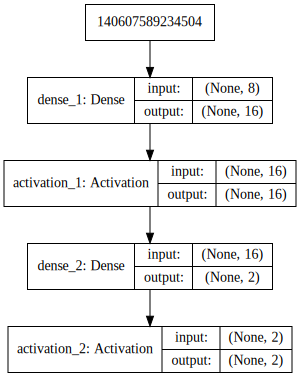

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Use the neural network classifier

Neural Network Classifier was performed on the Pulsar Stars dataset. There are 8 nodes and 16 perceptrons in the input layer and the output shows 2 nodes. This is a 8-16-2 neural network model. The model could be saved and attached to a web application for usage.
The accuracy from the neural network shown here is 98%. Without the neural network classifer, the accuracy was 97.99%.
The difference between the traditional learning models and the neural network classifier would be more obvious in a larger dataset.


In [0]:
model.fit(train_X, train_y_ohe, epochs=100, batch_size=1, verbose=1);

W0625 02:32:34.956107 140608748713856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0625 02:32:35.013593 140608748713856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
8949/8949 [==============================] - 10s 1ms/step - loss: 0.1293 - acc: 0.9582
Epoch 2/100
8949/8949 [==============================] - 9s 1ms/step - loss: 0.1004 - acc: 0.9716
Epoch 3/100
8949/8949 [==============================] - 9s 1ms/step - loss: 0.0993 - acc: 0.9730
Epoch 4/100
8949/8949 [==============================] - 10s 1ms/step - loss: 0.0976 - acc: 0.9724
Epoch 5/100
8949/8949 [==============================] - 9s 1ms/step - loss: 0.0950 - acc: 0.9721
Epoch 6/100
8949/8949 [==============================] - 9s 1ms/step - loss: 0.0946 - acc: 0.9723
Epoch 7/100
8949/8949 [==============================] - 9s 1ms/step - loss: 0.0954 - acc: 0.9716
Epoch 8/100
8949/8949 [==============================] - 9s 1ms/step - loss: 0.0924 - acc: 0.9740
Epoch 9/100
8949/8949 [==============================] - 9s 1ms/step - loss: 0.0939 - acc: 0.9734
Epoch 10/100
8949/8949 [==============================] - 9s 1ms/step - loss: 0.0917 - acc: 0.9736
Epoch 11/100
8949

In [0]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.98


# Saving Our Model



## Saving our Logistic Regression model to disk

In [0]:
from joblib import dump, load
dump(lr, 'lr_pulsarstar.joblib') 

['lr_pulsarstar.joblib']

## Loading our Logistic Regression model to disk

In [0]:
from joblib import dump, load
loaded_lr = clf = load('lr_pulsarstar.joblib') 

print("Accuracy = {:.2f}".format(loaded_lr.score(test_X, test_y)))

Accuracy = 0.98


In [0]:
pred_y = loaded_lr.predict([[140,50,0.1,-0.9,4,20,5,90]])
print (pred_y[0])


0.0


## Saving our Keras model to disk

In [0]:
model_json = model.to_json()
with open("pulsarstar_nn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("pulsarstar_nn.h5")
print("Saved model to disk")

Saved model to disk


## Loading our Keras model from disk

In [0]:
from keras.models import model_from_json

# load json and create model
json_file = open('pulsarstar_nn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("pulsarstar_nn.h5")
print("Loaded model from disk")


Loaded model from disk


In [0]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
loss, accuracy = loaded_model.evaluate(test_X, test_y_ohe, verbose=0)

print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.98


In [0]:
nn_y = loaded_model.predict(np.array([[140,50,0.1,-0.9,4,20,5,90],]))

print(np.round(nn_y))

[[1. 0.]]
